In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
%matplotlib inline

In [2]:
# Esse código recebe os dados em formato txt 
# salvos no repositório do projeto, e transforma em um DataFrame

dataFrameRSSI = {}
dataFrameDistacias = {}

# gerando lista de medidas:
listaDeMedidas =[]
cont = 0.5
while cont <= 10.0: 
    listaDeMedidas.append(cont)
    cont += 0.5

sizeMedidas = len(listaDeMedidas)
for i in range(sizeMedidas):
    medida = listaDeMedidas[i]
    nomeDoAquivo = "dados/experimento5/" + str(medida) + ' m.txt'
    arquivo = open(nomeDoAquivo, 'r')
    
    dadosRSSI = str()
    dadosDistancia = str()
    contadorlinha = 0
    for linha in arquivo:
        if (contadorlinha == 0):
            dadosRSSI = linha
            contadorlinha += 1
        elif (contadorlinha == 1):
            dadosDistancia = linha
            contadorlinha += 1
        else: 
            break # só estou interessado nas duas primeiras linha do arquivo
    
    # transformação de string para lista
    stringSizeRSSI = len(dadosRSSI)
    dadosRSSI = dadosRSSI[1:stringSizeRSSI-2]
    dadosRSSI = dadosRSSI.split(', ')
    sizeDados = len(dadosRSSI)
    
    # converte os dados de string para tipo de dados numerico
    
    for j in range(sizeDados):
        dadosRSSI[j] = int(dadosRSSI[j])
    
    # criando dicionário 
    coluna = str(medida) + 'm'
    dataFrameRSSI[coluna] = dadosRSSI

# Gerando um DataFrame
dataFrameRSSI = pd.DataFrame(data=dataFrameRSSI)
dataFrameRSSI

,0.5m,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
0,-67,-81,-77,-79,-83,-79,-71,-76,-81,-78,-83,-84,-77,-81,-76,-80,-78,-81,-80,-88
1,-77,-68,-76,-78,-83,-81,-76,-80,-77,-82,-83,-79,-77,-77,-80,-81,-80,-83,-80,-87
2,-72,-68,-76,-82,-80,-83,-78,-73,-84,-79,-83,-83,-71,-83,-78,-80,-80,-78,-86,-86
3,-72,-81,-78,-84,-86,-80,-75,-71,-84,-82,-82,-84,-77,-81,-79,-76,-80,-78,-85,-85
4,-69,-70,-77,-83,-82,-81,-84,-74,-77,-80,-82,-85,-80,-86,-78,-80,-82,-80,-83,-89
5,-69,-72,-77,-81,-81,-85,-75,-70,-80,-81,-82,-82,-80,-80,-77,-82,-80,-83,-80,-90
6,-75,-73,-75,-78,-80,-85,-75,-74,-79,-81,-82,-82,-80,-81,-78,-77,-82,-82,-87,-86
7,-69,-73,-77,-83,-81,-83,-80,-75,-79,-81,-81,-80,-79,-81,-77,-80,-80,-85,-83,-87
8,-74,-73,-77,-82,-80,-83,-86,-83,-80,-77,-80,-80,-80,-76,-77,-79,-82,-81,-88,-87
9,-74,-73,-77,-80,-83,-81,-74,-80,-82,-79,-82,-83,-79,-79,-80,-81,-82,-80,-79,-83


In [3]:
descricaoDosDados = dataFrameRSSI.describe()
descricaoDosDados

,0.5m,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-71.190000,-72.720000,-76.300000,-81.530000,-81.460000,-81.69000,-76.400000,-77.410000,-80.800000,-80.080000,-81.71,-82.14000,-79.770000,-80.110000,-78.940000,-78.480000,-80.560000,-82.850000,-80.100000,-84.620000
std,3.362584,2.835846,1.424887,1.321577,2.032166,2.09229,4.010088,4.341705,1.675733,3.142025,2.90,1.95412,3.116768,1.994411,1.412927,2.556355,1.409348,2.614547,4.307616,3.555562
min,-77.000000,-82.000000,-82.000000,-84.000000,-86.000000,-86.00000,-87.000000,-87.000000,-84.000000,-89.000000,-89.00,-86.00000,-90.000000,-86.000000,-84.000000,-84.000000,-83.000000,-87.000000,-90.000000,-91.000000
25%,-74.000000,-74.000000,-77.000000,-82.000000,-83.000000,-83.00000,-78.000000,-81.250000,-82.000000,-81.000000,-83.00,-83.00000,-80.000000,-81.000000,-80.000000,-80.250000,-82.000000,-86.000000,-83.000000,-87.000000
50%,-72.000000,-73.000000,-77.000000,-82.000000,-81.000000,-82.00000,-75.000000,-76.000000,-81.000000,-80.000000,-82.00,-82.00000,-79.000000,-80.000000,-79.000000,-79.000000,-80.000000,-82.000000,-80.000000,-85.000000
75%,-69.000000,-71.000000,-75.000000,-81.000000,-80.000000,-80.00000,-74.000000,-75.000000,-80.000000,-78.000000,-80.00,-81.00000,-78.000000,-79.000000,-78.000000,-76.000000,-80.000000,-81.000000,-78.000000,-82.000000
max,-61.000000,-66.000000,-71.000000,-77.000000,-76.000000,-76.00000,-68.000000,-68.000000,-76.000000,-75.000000,-75.00,-77.00000,-71.000000,-76.000000,-76.000000,-74.000000,-76.000000,-78.000000,-71.000000,-75.000000


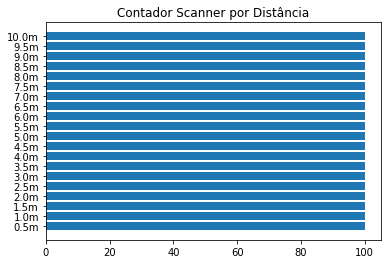

In [4]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][0])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Contador Scanner por Distância')
plt.savefig('graficocountdescribe.png')
plt.show()




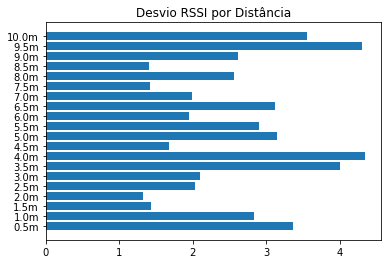

In [5]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][2])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Desvio RSSI por Distância')
#plt.savefig('graficocountdescribe.png')
plt.show()


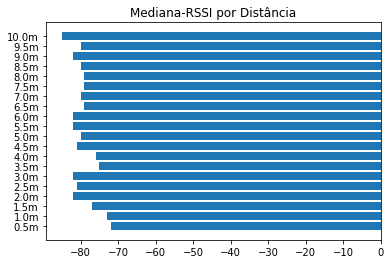

In [6]:
# grafico de barras p/ count

bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][5])
    

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Mediana-RSSI por Distância')
#plt.savefig('graficocountdescribe.png')
plt.show()

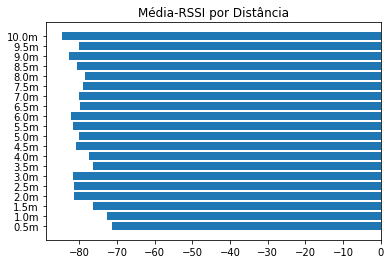

In [7]:
# grafico de barras p/ count

bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][1])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Média-RSSI por Distância')
#plt.savefig('graficocountdescribe.png')
plt.show()

In [8]:
resultados = {'d0(m)': [], 'd(m)': [], 'β0(dB)': [],  'RSSI(dBm)' : [], "PTx(dBm)": [], 'PL(dB)': [],  'x': [], 'y': [] }


d0 = 1.0 # valor fixo
d = 1.0 # distancia de medição, inicia em 1.0; 
tx = -59
f = (2.426) * math.pow(10,9)  # frenquencia do meio, Beacon BLE
c = 3 * math.pow(10,8)  
λ = c/f                 # comprimento de onda

β0 = (4 * math.pi * d0)/ λ
β0 = math.pow(β0,2)        # eleva ao quadrado
β0 = 10 * math.log10(β0)      # mudando a unidade de betaZero para dB


for i in descricaoDosDados:
    if i == '0.5m':
        continue # não estamos interessados na primeira medida; próximo 'i'
    
    RSSI = descricaoDosDados[i][5]
    pL = tx - RSSI
    
    #n = (pL - β0)/10*math.log10(d/d0)
    
    y = (pL - β0)/10
    x = math.log10(d/d0)
    
    resultados['d0(m)'].append(d0)
    resultados['d(m)'].append(d)
    resultados['RSSI(dBm)'].append(RSSI)
    resultados['PTx(dBm)'].append(tx)
    resultados['PL(dB)'].append(pL)
    #resultados['η'].append(n)
    resultados['β0(dB)'].append(β0)
    resultados['x'].append(x)
    resultados['y'].append(y)
    
    d += 0.5


resultadosDataFrame = pd.DataFrame(resultados)
resultadosDataFrame

,d0(m),d(m),β0(dB),RSSI(dBm),PTx(dBm),PL(dB),x,y
0,1.0,1.0,40.139588,-73.0,-59,14.0,0.000000,-2.613959
1,1.0,1.5,40.139588,-77.0,-59,18.0,0.176091,-2.213959
2,1.0,2.0,40.139588,-82.0,-59,23.0,0.301030,-1.713959
3,1.0,2.5,40.139588,-81.0,-59,22.0,0.397940,-1.813959
4,1.0,3.0,40.139588,-82.0,-59,23.0,0.477121,-1.713959
5,1.0,3.5,40.139588,-75.0,-59,16.0,0.544068,-2.413959
6,1.0,4.0,40.139588,-76.0,-59,17.0,0.602060,-2.313959
7,1.0,4.5,40.139588,-81.0,-59,22.0,0.653213,-1.813959
8,1.0,5.0,40.139588,-80.0,-59,21.0,0.698970,-1.913959
9,1.0,5.5,40.139588,-82.0,-59,23.0,0.740363,-1.713959


/home/rafaelfigueredog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


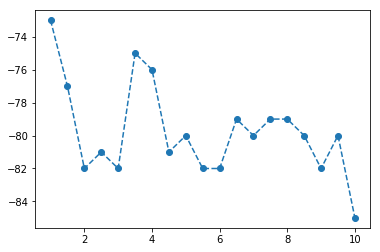

In [9]:
# Potencia do sinal recebido mediano em função da distancia

RSSI = []
distancias = []
d = 1.0
for i in descricaoDosDados:
    if i == '0.5m':
        continue
    RSSI.append(descricaoDosDados[i][5])
    distancias.append(d)
    d += 0.5

df = pd.DataFrame({'x': distancias, 'y': RSSI })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='--', marker='o')
#plt.show()


/home/rafaelfigueredog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


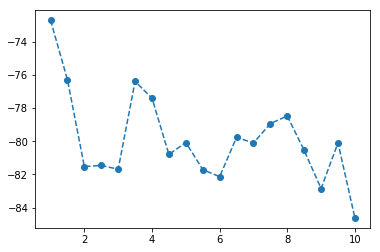

In [10]:
# Potencia do sinal recebido media em função da distancia

RSSI = []
distancias = []
d = 1.0
for i in descricaoDosDados:
    if i == '0.5m':
        continue
    RSSI.append(descricaoDosDados[i][1])
    distancias.append(d)
    d += 0.5

df = pd.DataFrame({'x': distancias, 'y': RSSI })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='--', marker='o')
#plt.show()

/home/rafaelfigueredog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  app.launch_new_instance()


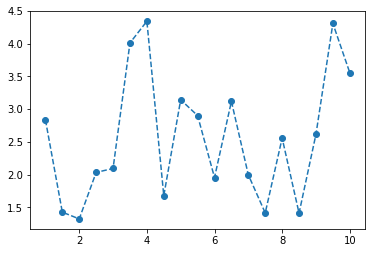

In [11]:
# Potencia do sinal recebido media em função da distancia

desvio = []
distancias = []
d = 1.0
for i in descricaoDosDados:
    if i == '0.5m':
        continue
    desvio.append(descricaoDosDados[i][2])
    distancias.append(d)
    d += 0.5

df = pd.DataFrame({'x': distancias, 'y': desvio })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='--', marker='o')
#plt.show()